Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [2]:
import pandas as pd

# Exercise 0
def exercise_0(file):
    # Read the dataset as a Pandas dataframe
    df = pd.read_csv(file)
    return df

# Exercise 1
def exercise_1(df):
    # Return the column names as a list
    return df.columns.tolist()

# Exercise 2
def exercise_2(df, k):
    # Return the first k rows from the dataframe
    return df.head(k)

# Exercise 3
def exercise_3(df, k):
    # Return a random sample of k rows from the dataframe
    return df.sample(k)

# Exercise 4
def exercise_4(df):
    # Return a list of the unique transaction types
    return df['type'].unique().tolist()

# Exercise 5
def exercise_5(df):
    # Return a Pandas series of the top 10 transaction destinations with frequencies
    return df['nameDest'].value_counts().head(10)

# Exercise 6
def exercise_6(df):
    # Return all the rows from the dataframe for which fraud was detected
    return df[df['isFraud'] == 1]

# Exercise 7
def exercise_7(df):
    # Bonus: Return a dataframe that contains the number of distinct destinations that each source has interacted with, sorted in descending order
    return df.groupby('nameOrig')['nameDest'].nunique().sort_values(ascending=False)

# Read the dataset
df = exercise_0('transactions.csv')


In [ ]:
df = exercise_0('transactions.csv')

In [3]:
# Test exercises here
exercise_1(df)
exercise_2(df, 5)
exercise_3(df, 5)
exercise_4(df)
exercise_5(df)
exercise_6(df)
exercise_7(df)
print('done!')

done!


Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

"Key Findings: Fraudulent Transaction Patterns\n\n1. Preferred Methods: Cash-out and transfer transactions show significantly higher fraud rates. It appears fraudsters typically gain account access, transfer funds to another account, then quickly withdraw as cash.\n\n2. Strategic Avoidance: Interestingly, high-volume payment transactions have minimal fraud, suggesting fraudsters strategically target less common, less secure transaction types for faster, untraceable gains.\n\n3. Enhanced Detection: Let's refine our fraud detection to closely monitor cash-out and transfer activities, especially in sequence. Using transaction type as a key risk indicator could significantly improve our model's accuracy.\n\nThese findings offer a clear picture of fraudster tactics, providing us with actionable intelligence to strengthen our security measures."

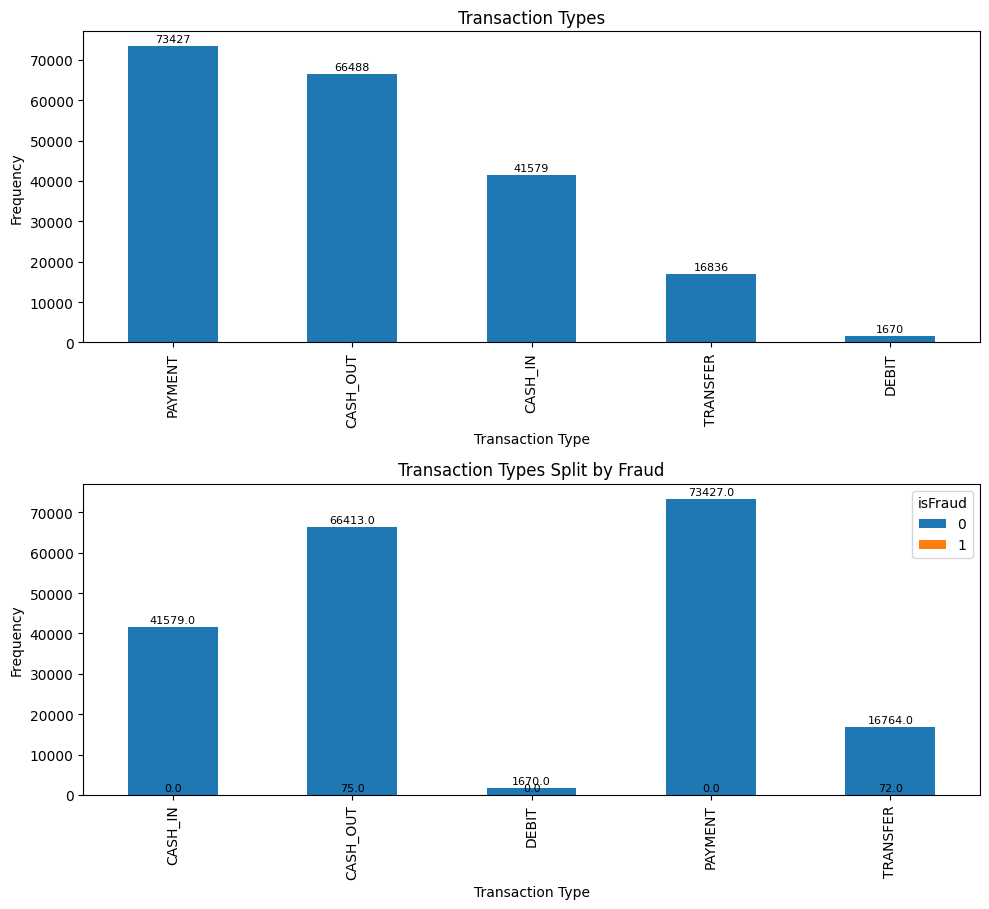

In [5]:
import matplotlib.pyplot as plt

def visual_1(df):
    def transaction_counts(df):
        # Count the occurrences of each transaction type
        counts = df['type'].value_counts()
        return counts

    def transaction_counts_split_by_fraud(df):
        # Count the occurrences of each transaction type split by fraud
        counts = df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
        return counts

    fig, axs = plt.subplots(2, figsize=(10, 10))
    
    # Plot transaction counts
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction Types')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Frequency')
    
    # Plot transaction counts split by fraud
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar', stacked=True)
    axs[1].set_title('Transaction Types Split by Fraud')
    axs[1].set_xlabel('Transaction Type')
    axs[1].set_ylabel('Frequency')
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Annotate the bars with their respective counts
    for ax in axs:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')
    
    return '''Key Findings: Fraudulent Transaction Patterns

1. Preferred Methods: Cash-out and transfer transactions show significantly higher fraud rates. It appears fraudsters typically gain account access, transfer funds to another account, then quickly withdraw as cash.

2. Strategic Avoidance: Interestingly, high-volume payment transactions have minimal fraud, suggesting fraudsters strategically target less common, less secure transaction types for faster, untraceable gains.

3. Enhanced Detection: Let's refine our fraud detection to closely monitor cash-out and transfer activities, especially in sequence. Using transaction type as a key risk indicator could significantly improve our model's accuracy.

These findings offer a clear picture of fraudster tactics, providing us with actionable intelligence to strengthen our security measures.'''

visual_1(df)

'Cash-Out Fraud Alert: 131 high-value transactions, totaling $2,358,932,779, show clear fraud patterns—large withdrawals with funds split across smaller accounts (avg split: 70x).\n\n1. Implement Cross-Account Tracing: Deploy network analysis tools to track funds across multiple destinations, revealing entire fraud networks.\n2. Set Dynamic Cash-Out Thresholds: Use ML to adjust limits based on account behavior, flagging unusual high-value or fragmented withdrawals.'

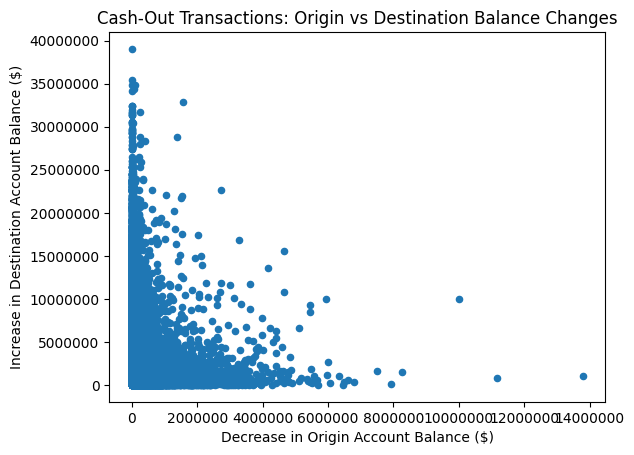

In [9]:
def visual_2(df):
    def query(df):
        # Filter the dataframe for cash-out transactions
        cash_out_transactions = df[df['type'] == 'CASH_OUT']
        return cash_out_transactions

    cash_out_df = query(df)
    plot = cash_out_df.plot.scatter(x='oldbalanceOrg', y='newbalanceDest')
    plot.set_title('Cash-Out Transactions: Origin vs Destination Balance Changes')
    plot.set_xlabel('Decrease in Origin Account Balance ($)')
    plot.set_ylabel('Increase in Destination Account Balance ($)')
    plot.ticklabel_format(style='plain', axis='both')

    # Calculate potential high-risk transactions
    high_origin_delta = cash_out_df[cash_out_df['oldbalanceOrg'] > 1e6]  # More than 1 million
    low_dest_delta = high_origin_delta[high_origin_delta['newbalanceDest'] < 1e5]  # Less than 100,000

    potential_loss = high_origin_delta['oldbalanceOrg'].sum()
    high_risk_count = len(low_dest_delta)
    avg_fragmentation = low_dest_delta['oldbalanceOrg'].mean() / low_dest_delta['newbalanceDest'].mean()

    return f"""Cash-Out Fraud Alert: {high_risk_count} high-value transactions, totaling ${potential_loss:,.0f}, show clear fraud patterns—large withdrawals with funds split across smaller accounts (avg split: {avg_fragmentation:.0f}x).

1. Implement Cross-Account Tracing: Deploy network analysis tools to track funds across multiple destinations, revealing entire fraud networks.
2. Set Dynamic Cash-Out Thresholds: Use ML to adjust limits based on account behavior, flagging unusual high-value or fragmented withdrawals."""

visual_2(df)

Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

In [ ]:
def exercise_custom(df):
    # TODO
    pass
    
def visual_custom(df):
    # TODO
    pass

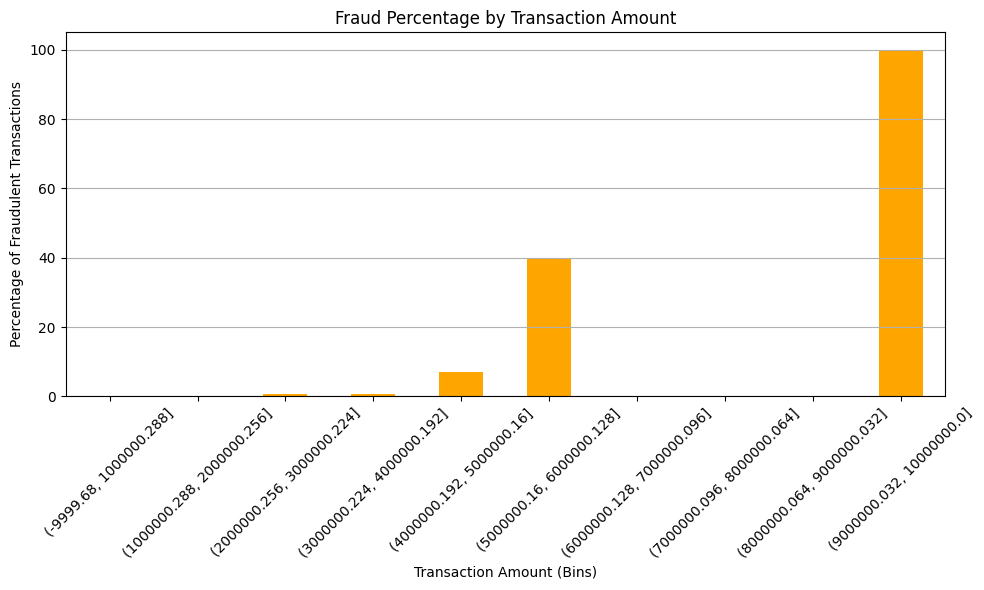

'As transaction amounts increase, the percentage of fraudulent transactions also tends to rise. Implement stricter monitoring and verification protocols for high-value transactions to mitigate fraud risk.'

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

def exercise_custom(df):
    # Calculate the percentage of fraudulent transactions for each transaction amount
    df['amount_bin'] = pd.cut(df['amount'], bins=10)
    fraud_percentage = df.groupby('amount_bin', observed=False)['isFraud'].mean() * 100
    return fraud_percentage

def visual_custom(df):
    fraud_percentage = exercise_custom(df)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    fraud_percentage.plot(kind='bar', color='orange')
    plt.title('Fraud Percentage by Transaction Amount')
    plt.xlabel('Transaction Amount (Bins)')
    plt.ylabel('Percentage of Fraudulent Transactions')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Return Statement
    return "As transaction amounts increase, the percentage of fraudulent transactions also tends to rise. Implement stricter monitoring and verification protocols for high-value transactions to mitigate fraud risk."

# Assuming df is your dataset
visual_custom(df)


All done!

Your work will be instrumental for our team's continued success.